<p style='font-size:18px;color:orange;font-weight:bold'>데이터 전처리(수치형 데이터 생성)</p> 

<p style='font-size:15px;font-weight:bold'>필요한 패키지, 데이터 불러오기</p> 

In [1]:
#패키지 불러오기
import pandas as pd
import numpy as np

In [2]:
#게임 정보 데이터 불러오기
#사용 속성:게임명, 출시일, 가격, 긍정적 평가, 부정적 평가, 장르
game=pd.read_csv("./steam_store_game.csv", index_col='name', encoding = 'cp949')
game=game[["release_date","price","positive_ratings","negative_ratings","genres"]]
game.head()

,release_date,price,positive_ratings,negative_ratings,genres
name,,,,,
Counter-Strike,2000-11-01,7.19,124534,3339,Action
Team Fortress Classic,1999-04-01,3.99,3318,633,Action
Day of Defeat,2003-05-01,3.99,3416,398,Action
Deathmatch Classic,2001-06-01,3.99,1273,267,Action
Half-Life: Opposing Force,1999-11-01,3.99,5250,288,Action


In [3]:
review=pd.read_csv("https://www.dl.dropboxusercontent.com/s/lp7f9h74ebwnf97/steam_reviews.csv?dl=0",index_col='title')
review.head()
#사용자 id정보가 담긴 데이터 세트의 경우 여러 국가의 언어가 섞여있어 분석에 용이하지 않음
#이용자 기반 추천 시스템->아이템 기반 추천 시스템으로 변경

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review
title,,,,,,,
Expansion - Hearts of Iron IV: Man the Guns,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...
Expansion - Hearts of Iron IV: Man the Guns,2019-02-10,0,0,184,False,Recommended,yes.
Expansion - Hearts of Iron IV: Man the Guns,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...
Dead by Daylight,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...
Dead by Daylight,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...


<p style='font-size:15px;font-weight:bold'>데이터 형태 변환</p> 

In [4]:
#시계열 데이터->년도 형태로 변환
game['year'] = pd.to_datetime(game['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
game=game.drop('release_date', axis=1)

In [5]:
review['year'] = pd.to_datetime(review['date_posted'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
review=review.drop('date_posted', axis=1)

In [6]:
#분석 과정에서 발견된 이상값 별도로 제거
a='Fire in the Goal "饔겻릉??",2016-10-26,1,Wild Planet Studio,Wild Planet Studio,windows,0,Single-player;Multi-player;Online Multi-Player;Co-op;Online Co-op;Steam Achievements;Steam Trading Cards;Steam Cloud;Stats;Steam Leaderboards,Action;Casual;Indie;Sports;Early Access,Early Access;Sports;Action,44,36,4,0,0,0,3.99\r\n535170,Climbtime,2017-05-03,1,Saluda Systems,Saluda Systems,windows,0,Single-player;Steam Achievements;Full controller support;Steam Leaderboards,Casual;Indie,Casual;Indie;VR,9,20,16,0,0,0,0.0\r\n535190,Chunky Orbits,2016-12-20,1,Don Whitaker,Brain Blinks,windows,0,Single-player;Full controller support;Steam Trading Cards,Simulation,Simulation;VR,0,13,1,0,0,0,1.59\r\n535230,Domina,2017-04-03,1,DolphinBarn,DolphinBarn,windows;mac,0,Single-player;Steam Achievements;Steam Trading Cards;Partial Controller Support,Action;Indie;Simulation;Strategy,Management;Pixel Graphics;Strategy,34,4260,635,341,460,200000-500000,6.99\r\n535240,Landmine Larry,2016-12-17,1,Furion Studios,Furion Studios,windows,0,Single-player;Steam Achievements;Steam Cloud,Action;Casual;Indie;Early Access,Early Access;Action;Indie,3,5,0,0,0,0,4.99\r\n535260,Save Home,2016-09-30,1,BadWolf Games,BadWolf Games,windows,0,Single-player;Steam Trading Cards,Action;Adventure;Indie;Simulation;Strategy,Action;Indie;Strategy,0,16,12,307,307,20000-50000,7.19\r\n535270,Constricting Cubes,2016-11-07,1,D.W.S.,D.W.S.,windows,0,Single-player;Full controller support,Action;Casual;Indie;Strategy,Strategy;Action;Indie,0,5,5,0,0,0,0.79\r\n535280,Retro Parking,2016-12-20,1,BYCODEC TEKNOLOJI LTD,BYCODEC TEKNOLOJI LTD,windows;mac,0,Single-player,Indie;Racing;Simulation;Strategy,Indie;Strategy;Simulation,0,34,5,0,0,0,1.69\r\n535290,Super Happy Singh,2016-10-06,1,Shrimasis Rout,Seed Games LLP,windows;mac;linux,0,Single-player;Full controller support;Steam Trading Cards,Action;Adventure;Casual,Action;Casual;Adventure,0,10,3,273,273,20000-50000,2.79\r\n535330,Block King,2017-02-10,1,Chris_Antoni,Chris_Antoni,windows,0,Single-player;Online Multi-Player,Action;Casual;Indie;Massively Multiplayer,Action;Indie;Casual,0,22,1,0,0,0,0.79\r\n535350,Elderine: Dreams to Destiny,2019-01-15,1,Black Alchemy Games,Black Alchemy Games,windows,0,Single-player;Partial Controller Support,Indie;RPG,Indie;RPG;Crafting,0,4,0,0,0,0,2.89\r\n535370,The Secret of Middle City,2016-11-29,1,GDG Entertainment,DreamasArtStudio,windows;mac,0,Single-player,Nudity;Adventure,Adventure;Nudity,0,1,2,0,0,0,5.79\r\n535380,Asteroid Blaster VR,2016-09-28,1,Senomix Research,Senomix Research,windows,0,Single-player;Steam Achievements,Action;Casual;Indie,Action;Indie;Casual,21,14,2,0,0,0,3.99\r\n535400,Breathing Fear,2016-10-07,1,LunarPixel,Atriagames,windows,0,Single-player;Steam Achievements;Full controller support;Steam Trading Cards,Adventure;Indie,Horror;Adventure;Indie,11,167,30,469,479,50000-100000,1.99\r\n535410,Saga of the Void: Admirals,2017-08-02,1,RowlesCorp Studios,Self-Published,windows,0,Single-player;Online Multi-Player;Online Co-op;Cross-Platform Multiplayer,Strategy,Strategy;VR;RTS,0,27,5,0,0,0,5.59\r\n535440,WAR7,2016-10-21,1,CPsoft,CPsoft,windows,0,Single-player;Online Multi-Player;Steam Achievements;In-App Purchases;Partial Controller Support,Action;Free to Play;Indie;Massively Multiplayer,Free to Play;Action;Indie,36,9,17,0,0,0,0.0\r\n535460,A Fear Of Heights'

In [7]:
#이상값, 결측값 제거
game=game.drop(index=a)
game=game.dropna(axis=0)
review=review.dropna(axis=0)

In [8]:
#전처리 완료된 데이터의 크기 확인 
game.shape

(26551, 5)

<p style='font-size:18px;color:orange;font-weight:bold'>군집 분석(K-means)</p> 

<p style='font-size:15px;font-weight:bold'>데이터 형태 변환</p> 

In [9]:
#수치형 데이터로만 이루어진 게임 정보 데이터 생성
#속성: 출시년도, 가격, 긍정평가, 부정평가
game_n=pd.DataFrame(data=game, columns=['year','price','positive_ratings',"negative_ratings"])
game_n.head()

,year,price,positive_ratings,negative_ratings
name,,,,
Counter-Strike,2000,7.19,124534,3339
Team Fortress Classic,1999,3.99,3318,633
Day of Defeat,2003,3.99,3416,398
Deathmatch Classic,2001,3.99,1273,267
Half-Life: Opposing Force,1999,3.99,5250,288


In [10]:
game_n = game_n.apply(pd.to_numeric, errors = 'coerce')
game_n.shape

(26551, 4)

<p style='font-size:15px;font-weight:bold'>데이터 표준화(MinMaxScaler 활용)</p> 

In [11]:
#데이터 표준화(sklearn.preprocessing 이용)
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환
scaler.fit(game_n)
game_scale = scaler.transform(game_n)

In [12]:
#표준화된 데이터를 행렬행태로 변환
game_scale=pd.DataFrame(game_scale, columns=["year","price","positive_ratings","negative_ratings"])
game_scale.head()

,year,price,positive_ratings,negative_ratings
0,0.136364,0.017038,0.047093,0.006855
1,0.090909,0.009455,0.001255,0.001300
2,0.272727,0.009455,0.001292,0.000817
3,0.181818,0.009455,0.000481,0.000548
4,0.090909,0.009455,0.001985,0.000591


<p style='font-size:15px;font-weight:bold'>최적의 군집 수 결정(엘보우 기법)</p> 

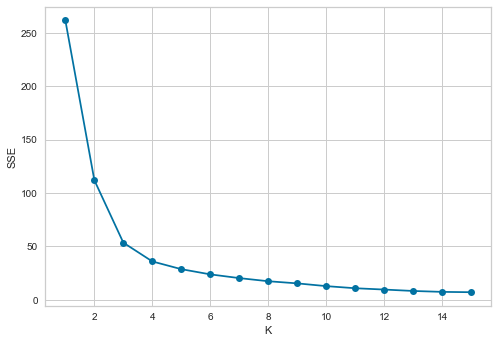

In [15]:
#엘로우 기법 적용 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
def elbow(x):
    sse = []
    for i in range(1,16):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42) #무작위성 컨트롤
        km.fit(x)
        sse.append(km.inertia_)

    plt.plot(range(1,16), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()
elbow(game_scale)
#결과: k=3이 가장 적절하다.

<p style='font-size:15px;font-weight:bold'>최적의 군집 수 결정(실루엣 계수)(k=3~6)</p> 

In [13]:
game_array=game_scale.to_numpy()

In [14]:
#kmeans의 객체 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,init='k-means++')
model.fit(game_scale)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(game_scale, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
game_scale['cluster']=model.labels_
game_scale['silhouette_score']=score_samples
game_scale

print(game_scale.groupby('cluster')['silhouette_score'].mean())

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(game_array.data,game_scale['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [2 2 2 ... 1 1 1]
(26551,)
[0.35477533 0.33525797 0.44089288 ... 0.65140761 0.65135949 0.6513595 ]
cluster
0    0.546780
1    0.637400
2    0.558073
Name: silhouette_score, dtype: float64
실루엣 계수:0.603


In [18]:
#kmeans의 객체 생성
model = KMeans(n_clusters=4,init='k-means++')
model.fit(game_scale)

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(game_scale, model.labels_ )

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
game_scale['cluster']=model.labels_
game_scale['silhouette_score']=score_samples
game_scale

print(game_scale.groupby('cluster')['silhouette_score'].mean())

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(game_array.data,game_scale['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

cluster
0    0.806347
1    0.869094
2    0.790043
3    0.746804
Name: silhouette_score, dtype: float64
실루엣 계수:0.533


In [19]:
#kmeans의 객체 생성
model = KMeans(n_clusters=5,init='k-means++')
model.fit(game_scale)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(game_scale, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
game_scale['cluster']=model.labels_
game_scale['silhouette_score']=score_samples
game_scale

game_scale.groupby('cluster')['silhouette_score'].mean()

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(game_array.data,game_scale['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [4 4 4 ... 3 3 3]
(26551,)
[0.59926256 0.57066388 0.70696952 ... 0.81431427 0.81554301 0.81554293]
실루엣 계수:0.551


In [20]:
#kmeans의 객체 생성
model = KMeans(n_clusters=6,init='k-means++')
model.fit(game_scale)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(game_scale, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
game_scale['cluster']=model.labels_
game_scale['silhouette_score']=score_samples
game_scale

game_scale.groupby('cluster')['silhouette_score'].mean()

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(game_array.data,game_scale['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [1 1 1 ... 4 4 4]
(26551,)
[0.60306092 0.57544419 0.70996111 ... 0.94877741 0.94885821 0.94885819]
실루엣 계수:0.503


In [ ]:
"""
실루엣 계수
k=3: 0.603
k=4: 0.533
k=5: 0.551
k=6: 0.503

최적의 군집 수: 3
"""

In [15]:
#다른 코드에서 활용하기 위해 데이터 세트 파일 저장
game['cluster']=model.labels_
game.to_csv('game.csv')

<p style='font-size:15px;font-weight:bold'>데이터 차원 축소(2차원)</p> 

In [39]:
final=game_scale.drop('silhouette_score', axis=1)
#final=game_scale.drop('cluster', axis=1)

In [40]:
# 2개의 차원으로 축소
from sklearn.manifold import TSNE
%matplotlib inline
transformed = TSNE(n_components=2).fit_transform(final)
transformed.shape

(26551, 2)

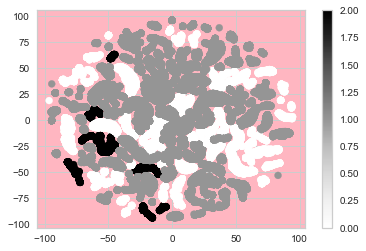

In [41]:
#그래프 출력
#2차원 그래프이므로 첫번째 열=x, 두번째 열=y
xs = transformed[:,0]
ys = transformed[:,1]
ax=plt.gca()
ax.set_facecolor('lightpink')
plt.scatter(xs,ys, c=game_scale['cluster'])  #라벨은 색상으로 분류됨
plt.colorbar()
plt.show()
#군집 결과가 제대로 보이기 않아 다른 방식으로 그래프 출력

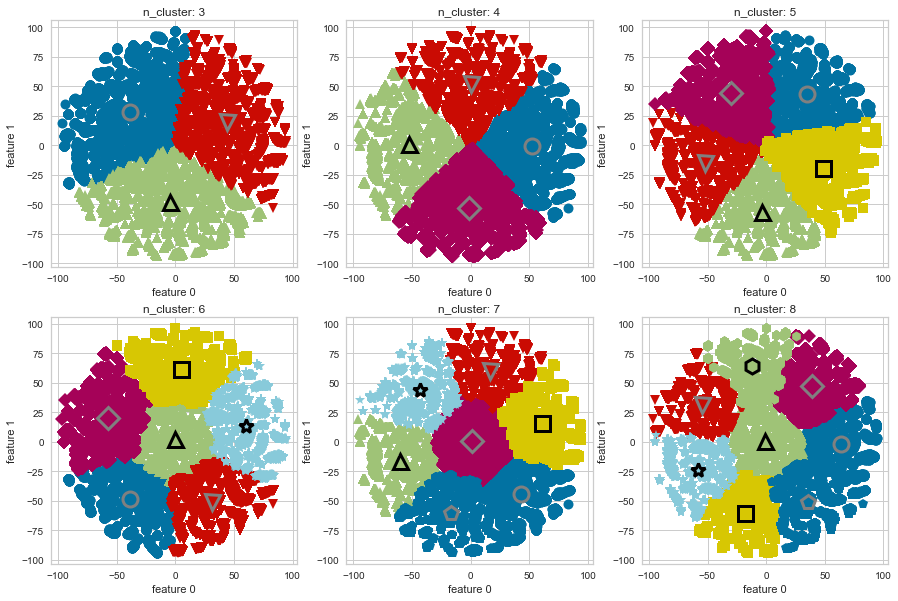

In [42]:
#군집 3~8개일 때 그래프 출력
#gridspec_kw={'hspace':0.5}
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(15,10)) # gridspec_kw: 그래프 수평간격
n_clusters_set = [3, 4, 5, 6, 7, 8] 
for n, ax in zip(n_clusters_set, axes.ravel()):
    kmeans = KMeans(n_clusters=n) # 클러스터 갯수
    kmeans.fit(transformed)
    mglearn.discrete_scatter(transformed[:, 0], transformed[:, 1], y=kmeans.labels_, ax=ax) # x, y, group, ax = plot객체
    mglearn.discrete_scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], y=np.unique(kmeans.labels_), # x, y, group
        markeredgewidth=3, ax=ax, s=15) # 두께, 그림객체, 사이즈
    ax.set_title('n_cluster: {}'.format(n)) # title
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
plt.show()

<p style='font-size:15px;font-weight:bold'>군집화(클러스터)열 기준 데이터에 추가</p> 

In [16]:
scale=pd.read_csv(r"C:\Users\jeongmi\game_scale.csv")

In [17]:
scale=scale.drop('Unnamed: 0',axis=1)
scale=scale.drop('cluster',axis=1)
scale=scale.drop('silhouette_score',axis=1)

In [18]:
#kmeans의 객체 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,init='k-means++')
model.fit(scale)

KMeans(n_clusters=3)

In [19]:
game['cluster']=model.labels_
game.head()

,price,positive_ratings,negative_ratings,genres,year,cluster
name,,,,,,
Counter-Strike,7.19,124534,3339,Action,2000,1
Team Fortress Classic,3.99,3318,633,Action,1999,1
Day of Defeat,3.99,3416,398,Action,2003,1
Deathmatch Classic,3.99,1273,267,Action,2001,1
Half-Life: Opposing Force,3.99,5250,288,Action,1999,1


<p style='font-size:18px;color:orange;font-weight:bold'>감성 분석(리뷰 데이터 활용)</p> 

<p style='font-size:15px;font-weight:bold'>리뷰 문자 전처리</p> 

In [20]:
#단어, 문자 사전 패키지 다운로드
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeongmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeongmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
#알파벳, 숫자가 아닌 문자를 공백으로 변경
review['review'] = review['review'].str.replace(pat=r'[^A-Za-z0-9]', repl= r' ', regex=True) 
review['review'] = review['review'].str.replace(pat=r'[\s\s+]', repl= r' ', regex=True)

In [22]:
#리뷰관련 열 대문자->소문자
review['review']=review['review'].astype(str).str.lower()

In [23]:
#불용어 제거
#i, the, is, the, a 등 의미 탐색에 기여하지 않는 단어 제거
stop = set(stopwords.words('english'))
no_stops = [word for word in review if not word in stop]

In [52]:
review['token']=review['review'].apply(word_tokenize)

<p style='font-size:15px;font-weight:bold'>문자형 리뷰->점수 형태(감정 평가)</p> 

In [24]:
#게임 리뷰의 감정 평가(점수)(리뷰 데이터에 사용자 별점 점수가 없기 때문)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jeongmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
def detScore(num): # 강한 부정(-2)부터 강한 긍정(2)로 분류 
    if num < -0.5: return -2
    elif num >= -0.5 and num < 0:  return -1
    elif num == 0.0: return 0
    elif num > 0 and num <= 0.5: return 1
    else: return 2

In [26]:
#neg: 부정, neu: 중립, pos: 긍정, compound: 복합 점수
re=review['review'].tolist()
s=[]
for index, row in enumerate(re):
    score=sia.polarity_scores(row)['compound']
    score=score+1
    s.append(score)
    
#긍정, 부정 점수 리뷰 데이터에 추가
review['score']=s
#기존에는 긍정, 중립, 긍정, 복합점수 모두 출력 
#현재는 복합점수(-1~1)만 필요하기때문에 이것만 출력
#예측 용이성을 위해 소수점 3자리까지만 출력
#점수가 음수인 결과 예측모델의 오차범위를 분석하기에 좋지 않아 양수로 변형하기 위해 +1을 함
review.head()

,funny,helpful,hour_played,is_early_access_review,recommendation,review,year,score
title,,,,,,,,
Expansion - Hearts of Iron IV: Man the Guns,2,4,578,False,Recommended,gt played as german reich gt declare war on b...,2019,1.8316
Expansion - Hearts of Iron IV: Man the Guns,0,0,184,False,Recommended,yes,2019,1.4019
Expansion - Hearts of Iron IV: Man the Guns,0,0,892,False,Recommended,very good game although a bit overpriced in my...,2019,1.8012
Dead by Daylight,126,1086,676,False,Recommended,out of all the reviews i wrote this one is pro...,2018,0.5940
Dead by Daylight,85,2139,612,False,Recommended,disclaimer i survivor main i play games for f...,2017,0.1922


In [27]:
#게임 명을 기준으로 그룹화하여 각 게임의 평가 점수를 출력(별점 대용)
#점수 열만 필요하므로 다른 데이터의 변화는 상관 없음
review=review.groupby(['title']).mean()

In [28]:
for i in range(len(review)):
    review['score'][i]=round(review['score'][i],3)
review.head()

,funny,helpful,hour_played,is_early_access_review,score
title,,,,,
ACE COMBAT™ 7: SKIES UNKNOWN,23.900000,265.200000,23.900000,0.000000,1.478
ARK: Survival Evolved,30.067010,117.819588,882.891753,0.618557,1.173
ASTRONEER,0.238901,2.567344,49.765613,0.942438,1.659
Battlefleet Gothic: Armada 2,9.700000,90.000000,59.100000,0.000000,1.550
Beat Saber,89.200000,230.000000,57.300000,1.000000,1.398


<p style='font-size:15px;font-weight:bold'>정보 데이터에 감정 분석 결과 열 추가</p> 

<p style='font-size:18px;color:orange;font-weight:bold'>예측 모델에 적용할 최종 데이터 생성</p> 

In [29]:
#리뷰데이터에서 얻은 점수결과를 정보 데이터의 중복되는 게임 행에 추가
import random
from random import uniform
for i in range(len(game)):
    for j in range(len(review)):
        if game.index[i]==review.index[j]:
            game['score']=review['score']  

In [30]:
#행에 추가한 결과 40개의 게임 데이터행에 점수 데이터 추가됨
#내림차순하여 점수가 추가된 행이 상위로 올라오도록 설정
game=game.sort_values('score',ascending=False)

In [31]:
#결측값에 0~2사이의 랜덤한 숫자 넣기
for i in range(40,len(game)):
    game['score'][i]=uniform(0.0, 2.0)
    game['score'][i]=round(game['score'][i],3)

<ipython-input-31-878d92ca1e28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['score'][i]=uniform(0.0, 2.0)
<ipython-input-31-878d92ca1e28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['score'][i]=round(game['score'][i],3)


<p style='font-size:15px;font-weight:bold'>정보 데이터의 장르 열 전처리</p> 

In [32]:
#;기준으로 데이터를 잘랐을 때 0번째에 속하는 데이터로 장르 확정
game['genre']=game.genres.str.split(';').str[0]
#기존 장르열 제거
game=game.drop('genres', axis=1)

In [33]:
#장르 데이터열의 빈도 출력
game['genre'].value_counts()

Action                   11029
Adventure                 5130
Casual                    4294
Indie                     2592
Violent                    697
Simulation                 617
Strategy                   497
RPG                        391
Free to Play               386
Sexual Content             238
Racing                     193
Nudity                     109
Sports                      82
Gore                        79
Animation & Modeling        65
Utilities                   60
Design & Illustration       28
Audio Production            16
Massively Multiplayer       15
Education                   14
Early Access                 9
Video Production             5
Accounting                   2
Photo Editing                1
Software Training            1
Web Publishing               1
Name: genre, dtype: int64

In [36]:
#원 핫 인코딩 방식을 사용하면 26개의 열이 생성되므로 사용X
#반복문으로 번호 지정
for i in range(len(game)):
    if game['genre'][i]=='Action':
        game['genre'][i]=1
    if game['genre'][i]=='Adventure':
        game['genre'][i]=2
    if game['genre'][i]=='Casual':
        game['genre'][i]=3
    if game['genre'][i]=='Indie':
        game['genre'][i]=4
    if game['genre'][i]=='Violent':
        game['genre'][i]=5
    if game['genre'][i]=='Simulation':
        game['genre'][i]=6
    if game['genre'][i]=='RPG':
        game['genre'][i]=7
    if game['genre'][i]=='Strategy':
        game['genre'][i]=8
    if game['genre'][i]=='Free to Play':
        game['genre'][i]=9
    if game['genre'][i]=='Sports':
        game['genre'][i]=10
    if game['genre'][i]=='Racing':
        game['genre'][i]=11
    if game['genre'][i]=='Gore':
        game['genre'][i]=12
    if game['genre'][i]=='Sexual Content':
        game['genre'][i]=13
    if game['genre'][i]=='Nudity':
        game['genre'][i]=14
    if game['genre'][i]=='Animation & Modeling':
        game['genre'][i]=15
    if game['genre'][i]=='Design & Illustration':
        game['genre'][i]=16
    if game['genre'][i]=='Video Production':
        game['genre'][i]=17
    if game['genre'][i]=='Audio Production':
        game['genre'][i]=18
    if game['genre'][i]=='Photo Editing':
        game['genre'][i]=19
    if game['genre'][i]=='Education':
        game['genre'][i]=20
    if game['genre'][i]=='Software Training':
        game['genre'][i]=21
    if game['genre'][i]=='Web Publishing':
        game['genre'][i]=22
    if game['genre'][i]=='Accounting':
        game['genre'][i]=23
    if game['genre'][i]=='Early Access':
        game['genre'][i]=24
    if game['genre'][i]=='Single-player':
        game['genre'][i]=25
    if game['genre'][i]=='Massively Multiplayer':
        game['genre'][i]=26
    if game['genre'][i]=='Utilities':
        game['genre'][i]=27

<ipython-input-36-54d1ec7ff6e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['genre'][i]=4
<ipython-input-36-54d1ec7ff6e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['genre'][i]=2
<ipython-input-36-54d1ec7ff6e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['genre'][i]=1
<ipython-input-36-54d1ec7ff6e4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [37]:
game.head()

,price,positive_ratings,negative_ratings,year,cluster,score,genre
name,,,,,,,
Foundation,26.99,1228,386,2019,0,1.810,4
My Time At Portia,24.99,10695,1108,2019,0,1.797,2
Overcooked! 2,19.99,5362,1274,2018,0,1.750,1
ASTRONEER,23.79,28375,5246,2019,0,1.659,2
Human: Fall Flat,11.99,28371,2678,2016,2,1.656,2


In [38]:
#예측을 위한 최종 데이터 생성 완료
game.to_csv('game.csv')

<p style='font-size:18px;color:orange;font-weight:bold'>예측 모델 적용 +Grid Search</p> 

In [39]:
#위에서 생성한 최종 데이터 불러오기
game=pd.read_csv(r"C:\Users\jeongmi\game.csv",index_col='name')
game.head()

,price,positive_ratings,negative_ratings,year,cluster,score,genre
name,,,,,,,
Foundation,26.99,1228,386,2019,0,1.810,4
My Time At Portia,24.99,10695,1108,2019,0,1.797,2
Overcooked! 2,19.99,5362,1274,2018,0,1.750,1
ASTRONEER,23.79,28375,5246,2019,0,1.659,2
Human: Fall Flat,11.99,28371,2678,2016,2,1.656,2


<p style='font-size:15px;font-weight:bold'>데이터 표준화(MinMaxScaler 활용)</p> 

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(game)
game_std = sc.transform(game)

In [41]:
#표준화된 데이터를 행렬행태로 변환
game_std=pd.DataFrame(game_std, columns=["price","positive_ratings","negative_ratings","year","cluster","score","genre"])
#표준화된 데이터 세트의 인덱스명을 원본 수치데이터의 인덱스와 동일하게 변경
game_std=game_std.set_index(game.index)
game_std.head()

,price,positive_ratings,negative_ratings,year,cluster,score,genre
name,,,,,,,
Foundation,0.063959,0.000464,0.000792,1.000000,0.0,0.9050,0.115385
My Time At Portia,0.059219,0.004044,0.002275,1.000000,0.0,0.8985,0.038462
Overcooked! 2,0.047371,0.002028,0.002616,0.954545,0.0,0.8750,0.000000
ASTRONEER,0.056376,0.010730,0.010770,1.000000,0.0,0.8295,0.038462
Human: Fall Flat,0.028413,0.010729,0.005498,0.863636,1.0,0.8280,0.038462


<p style='font-size:15px;font-weight:bold'>데이터 분할(학습용, 평가용)</p> 

In [42]:
from sklearn.model_selection import train_test_split
feature_columns = list(game.columns.difference(['score']))
X = game_std[feature_columns]
y = game_std['score']
# 학습데이터와 평가데이터의 비율을 7:3 로 분할| 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(18585, 6) (7966, 6) (18585,) (7966,)


<p style='font-size:15px;font-weight:bold'>Random Forest 적용(defalt값 적용)</p> 

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

forest = RandomForestRegressor()
forest.fit(train_x, train_y)
y_pred = forest.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))

print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

mae:  0.2599597106956885
mse:  0.09374808819839098
rmse:  0.30618309587302656


<p style='font-size:15px;font-weight:bold'>Random Forest 적용(Grid Search)</p> 

In [ ]:
#그리드 서치 시간이 많이 걸려 파라미터 값을 변경해가며 여러번 코드 실행
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'n_estimators' : [100,200,250],
    'max_depth' : [6,8,10],
    "max_features":[3,4,5,6],
    'min_samples_split':[4, 6, 8]}

rf_grid = GridSearchCV(forest, rf_param_grid,  cv = 10, n_jobs = -1,)
rf_grid.fit(train_x, train_y)

print("최고의 파라미터 :", rf_grid.best_params_)
"""
rf_grid.best_params_ 결과
{'max_depth': 4, 'max_features': 4, 'min_samples_split': 8, 'n_estimators': 200}
"""

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'n_estimators' : [200],
    'max_depth' : [6],
    "max_features":[4],
    'min_samples_split':[2, 4, 6],
    'min_samples_leaf':[4, 6, 8]}

rf_grid = GridSearchCV(forest, rf_param_grid,  cv = 10, n_jobs = -1,)
rf_grid.fit(train_x, train_y)

print("최고의 파라미터 :", rf_grid.best_params_)
"""
rf_grid.best_params_ 결과
{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}
"""

In [44]:
forest = RandomForestRegressor(max_depth=6, max_features=4, min_samples_leaf=8, min_samples_split=2, n_estimators=200)
forest.fit(train_x, train_y)
y_pred = forest.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))

print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

mae:  0.25095743989128605
mse:  0.08424297640243342
rmse:  0.29024640635576077


<p style='font-size:15px;font-weight:bold'>CatBoost 적용(defalt값 적용)</p> 

In [45]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(train_x, train_y)
y_pred = cb_model.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))

print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

Learning rate set to 0.064969
0:	learn: 0.2883271	total: 161ms	remaining: 2m 41s
1:	learn: 0.2882956	total: 167ms	remaining: 1m 23s
2:	learn: 0.2882459	total: 175ms	remaining: 58.1s
3:	learn: 0.2882285	total: 181ms	remaining: 45s
4:	learn: 0.2882046	total: 187ms	remaining: 37.2s
5:	learn: 0.2881802	total: 193ms	remaining: 32.1s
6:	learn: 0.2881567	total: 200ms	remaining: 28.3s
7:	learn: 0.2881400	total: 208ms	remaining: 25.8s
8:	learn: 0.2881207	total: 215ms	remaining: 23.7s
9:	learn: 0.2880926	total: 221ms	remaining: 21.9s
10:	learn: 0.2880502	total: 227ms	remaining: 20.4s
11:	learn: 0.2880339	total: 233ms	remaining: 19.2s
12:	learn: 0.2880092	total: 240ms	remaining: 18.2s
13:	learn: 0.2879962	total: 246ms	remaining: 17.4s
14:	learn: 0.2879565	total: 254ms	remaining: 16.7s
15:	learn: 0.2879260	total: 261ms	remaining: 16.1s
16:	learn: 0.2879152	total: 269ms	remaining: 15.5s
17:	learn: 0.2878816	total: 277ms	remaining: 15.1s
18:	learn: 0.2878618	total: 285ms	remaining: 14.7s
19:	learn: 

167:	learn: 0.2849349	total: 1.36s	remaining: 6.76s
168:	learn: 0.2849056	total: 1.37s	remaining: 6.75s
169:	learn: 0.2848813	total: 1.38s	remaining: 6.75s
170:	learn: 0.2848509	total: 1.39s	remaining: 6.74s
171:	learn: 0.2848364	total: 1.4s	remaining: 6.73s
172:	learn: 0.2848276	total: 1.41s	remaining: 6.73s
173:	learn: 0.2848186	total: 1.41s	remaining: 6.71s
174:	learn: 0.2848044	total: 1.42s	remaining: 6.7s
175:	learn: 0.2847954	total: 1.43s	remaining: 6.68s
176:	learn: 0.2847539	total: 1.43s	remaining: 6.67s
177:	learn: 0.2847225	total: 1.44s	remaining: 6.66s
178:	learn: 0.2846831	total: 1.45s	remaining: 6.64s
179:	learn: 0.2846535	total: 1.45s	remaining: 6.63s
180:	learn: 0.2846468	total: 1.46s	remaining: 6.61s
181:	learn: 0.2846220	total: 1.47s	remaining: 6.59s
182:	learn: 0.2846058	total: 1.47s	remaining: 6.58s
183:	learn: 0.2845869	total: 1.48s	remaining: 6.56s
184:	learn: 0.2845481	total: 1.48s	remaining: 6.54s
185:	learn: 0.2845315	total: 1.49s	remaining: 6.53s
186:	learn: 0.

326:	learn: 0.2814720	total: 2.55s	remaining: 5.25s
327:	learn: 0.2814553	total: 2.56s	remaining: 5.25s
328:	learn: 0.2814435	total: 2.57s	remaining: 5.24s
329:	learn: 0.2814344	total: 2.57s	remaining: 5.23s
330:	learn: 0.2814119	total: 2.58s	remaining: 5.22s
331:	learn: 0.2814014	total: 2.59s	remaining: 5.2s
332:	learn: 0.2813823	total: 2.59s	remaining: 5.19s
333:	learn: 0.2813588	total: 2.6s	remaining: 5.18s
334:	learn: 0.2813358	total: 2.6s	remaining: 5.17s
335:	learn: 0.2813135	total: 2.61s	remaining: 5.16s
336:	learn: 0.2812853	total: 2.61s	remaining: 5.14s
337:	learn: 0.2812844	total: 2.63s	remaining: 5.14s
338:	learn: 0.2812555	total: 2.63s	remaining: 5.13s
339:	learn: 0.2812362	total: 2.65s	remaining: 5.14s
340:	learn: 0.2812305	total: 2.67s	remaining: 5.16s
341:	learn: 0.2811934	total: 2.69s	remaining: 5.18s
342:	learn: 0.2811637	total: 2.71s	remaining: 5.18s
343:	learn: 0.2811512	total: 2.72s	remaining: 5.18s
344:	learn: 0.2811245	total: 2.73s	remaining: 5.18s
345:	learn: 0.2

509:	learn: 0.2779233	total: 3.77s	remaining: 3.62s
510:	learn: 0.2779133	total: 3.77s	remaining: 3.61s
511:	learn: 0.2778852	total: 3.78s	remaining: 3.6s
512:	learn: 0.2778674	total: 3.79s	remaining: 3.6s
513:	learn: 0.2778555	total: 3.79s	remaining: 3.59s
514:	learn: 0.2778358	total: 3.8s	remaining: 3.58s
515:	learn: 0.2778098	total: 3.81s	remaining: 3.57s
516:	learn: 0.2777800	total: 3.81s	remaining: 3.56s
517:	learn: 0.2777609	total: 3.82s	remaining: 3.55s
518:	learn: 0.2777332	total: 3.82s	remaining: 3.54s
519:	learn: 0.2777127	total: 3.83s	remaining: 3.54s
520:	learn: 0.2776847	total: 3.84s	remaining: 3.53s
521:	learn: 0.2776773	total: 3.84s	remaining: 3.52s
522:	learn: 0.2776669	total: 3.85s	remaining: 3.51s
523:	learn: 0.2776362	total: 3.85s	remaining: 3.5s
524:	learn: 0.2776315	total: 3.86s	remaining: 3.49s
525:	learn: 0.2776172	total: 3.86s	remaining: 3.48s
526:	learn: 0.2775985	total: 3.87s	remaining: 3.47s
527:	learn: 0.2775829	total: 3.88s	remaining: 3.46s
528:	learn: 0.27

677:	learn: 0.2751367	total: 4.77s	remaining: 2.27s
678:	learn: 0.2751185	total: 4.78s	remaining: 2.26s
679:	learn: 0.2750998	total: 4.78s	remaining: 2.25s
680:	learn: 0.2750842	total: 4.79s	remaining: 2.24s
681:	learn: 0.2750697	total: 4.8s	remaining: 2.24s
682:	learn: 0.2750576	total: 4.8s	remaining: 2.23s
683:	learn: 0.2750261	total: 4.81s	remaining: 2.22s
684:	learn: 0.2750092	total: 4.81s	remaining: 2.21s
685:	learn: 0.2749950	total: 4.82s	remaining: 2.21s
686:	learn: 0.2749889	total: 4.83s	remaining: 2.2s
687:	learn: 0.2749813	total: 4.83s	remaining: 2.19s
688:	learn: 0.2749641	total: 4.84s	remaining: 2.18s
689:	learn: 0.2749612	total: 4.84s	remaining: 2.17s
690:	learn: 0.2749474	total: 4.85s	remaining: 2.17s
691:	learn: 0.2749280	total: 4.85s	remaining: 2.16s
692:	learn: 0.2749270	total: 4.86s	remaining: 2.15s
693:	learn: 0.2749044	total: 4.86s	remaining: 2.14s
694:	learn: 0.2748997	total: 4.87s	remaining: 2.14s
695:	learn: 0.2748850	total: 4.88s	remaining: 2.13s
696:	learn: 0.2

843:	learn: 0.2727386	total: 5.78s	remaining: 1.07s
844:	learn: 0.2727133	total: 5.78s	remaining: 1.06s
845:	learn: 0.2726954	total: 5.79s	remaining: 1.05s
846:	learn: 0.2726630	total: 5.79s	remaining: 1.05s
847:	learn: 0.2726514	total: 5.8s	remaining: 1.04s
848:	learn: 0.2726453	total: 5.81s	remaining: 1.03s
849:	learn: 0.2726325	total: 5.81s	remaining: 1.02s
850:	learn: 0.2726210	total: 5.82s	remaining: 1.02s
851:	learn: 0.2726094	total: 5.83s	remaining: 1.01s
852:	learn: 0.2725920	total: 5.83s	remaining: 1s
853:	learn: 0.2725676	total: 5.84s	remaining: 998ms
854:	learn: 0.2725535	total: 5.84s	remaining: 991ms
855:	learn: 0.2725309	total: 5.85s	remaining: 984ms
856:	learn: 0.2725203	total: 5.86s	remaining: 977ms
857:	learn: 0.2725166	total: 5.86s	remaining: 970ms
858:	learn: 0.2725058	total: 5.87s	remaining: 963ms
859:	learn: 0.2724863	total: 5.88s	remaining: 956ms
860:	learn: 0.2724804	total: 5.88s	remaining: 950ms
861:	learn: 0.2724707	total: 5.89s	remaining: 943ms
862:	learn: 0.27

<p style='font-size:15px;font-weight:bold'>CatBoost 적용(Grid Search)</p> 

In [ ]:
cb_param_grid = {
    'iterations': [500,600, 700, 800, 900],
    'depth': [4, 5, 6]}

cb_grid = GridSearchCV(cb_model, cb_param_grid,  cv = 10, n_jobs = -1,)
cb_grid.fit(train_x, train_y)

print("최고의 파라미터 :", cb_grid.best_params_)
"""
cb_grid.best_params_ 결과
{'depth': 4, 'iterations': 900}
"""

In [46]:
cb_model = CatBoostRegressor(depth=4, iterations=900)
cb_model.fit(train_x, train_y)
y_pred = cb_model.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))

print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

Learning rate set to 0.07078
0:	learn: 0.2883413	total: 4.67ms	remaining: 4.19s
1:	learn: 0.2883198	total: 9.66ms	remaining: 4.34s
2:	learn: 0.2883086	total: 17.3ms	remaining: 5.16s
3:	learn: 0.2882846	total: 21.5ms	remaining: 4.82s
4:	learn: 0.2882577	total: 26.8ms	remaining: 4.79s
5:	learn: 0.2882387	total: 31.4ms	remaining: 4.67s
6:	learn: 0.2882209	total: 35.9ms	remaining: 4.58s
7:	learn: 0.2882071	total: 42.5ms	remaining: 4.74s
8:	learn: 0.2881890	total: 48.1ms	remaining: 4.76s
9:	learn: 0.2881757	total: 54.1ms	remaining: 4.82s
10:	learn: 0.2881719	total: 60.8ms	remaining: 4.91s
11:	learn: 0.2881567	total: 65.3ms	remaining: 4.83s
12:	learn: 0.2881520	total: 72.7ms	remaining: 4.96s
13:	learn: 0.2881451	total: 77.3ms	remaining: 4.89s
14:	learn: 0.2881351	total: 82.5ms	remaining: 4.87s
15:	learn: 0.2881220	total: 87.5ms	remaining: 4.83s
16:	learn: 0.2881062	total: 93.3ms	remaining: 4.85s
17:	learn: 0.2880897	total: 97.7ms	remaining: 4.79s
18:	learn: 0.2880600	total: 102ms	remaining: 

170:	learn: 0.2864541	total: 814ms	remaining: 3.47s
171:	learn: 0.2864347	total: 818ms	remaining: 3.46s
172:	learn: 0.2864252	total: 822ms	remaining: 3.45s
173:	learn: 0.2864140	total: 827ms	remaining: 3.45s
174:	learn: 0.2864081	total: 832ms	remaining: 3.45s
175:	learn: 0.2863962	total: 837ms	remaining: 3.44s
176:	learn: 0.2863934	total: 842ms	remaining: 3.44s
177:	learn: 0.2863824	total: 847ms	remaining: 3.43s
178:	learn: 0.2863654	total: 853ms	remaining: 3.44s
179:	learn: 0.2863581	total: 860ms	remaining: 3.44s
180:	learn: 0.2863506	total: 864ms	remaining: 3.43s
181:	learn: 0.2863485	total: 875ms	remaining: 3.45s
182:	learn: 0.2863408	total: 882ms	remaining: 3.46s
183:	learn: 0.2863268	total: 888ms	remaining: 3.46s
184:	learn: 0.2863195	total: 893ms	remaining: 3.45s
185:	learn: 0.2863139	total: 903ms	remaining: 3.46s
186:	learn: 0.2862941	total: 910ms	remaining: 3.47s
187:	learn: 0.2862843	total: 918ms	remaining: 3.48s
188:	learn: 0.2862670	total: 924ms	remaining: 3.48s
189:	learn: 

348:	learn: 0.2843485	total: 1.8s	remaining: 2.84s
349:	learn: 0.2843348	total: 1.81s	remaining: 2.84s
350:	learn: 0.2843301	total: 1.81s	remaining: 2.83s
351:	learn: 0.2843250	total: 1.81s	remaining: 2.83s
352:	learn: 0.2843167	total: 1.82s	remaining: 2.82s
353:	learn: 0.2843033	total: 1.82s	remaining: 2.82s
354:	learn: 0.2842894	total: 1.83s	remaining: 2.81s
355:	learn: 0.2842767	total: 1.84s	remaining: 2.81s
356:	learn: 0.2842709	total: 1.84s	remaining: 2.8s
357:	learn: 0.2842661	total: 1.85s	remaining: 2.79s
358:	learn: 0.2842627	total: 1.85s	remaining: 2.79s
359:	learn: 0.2842523	total: 1.86s	remaining: 2.79s
360:	learn: 0.2842432	total: 1.86s	remaining: 2.78s
361:	learn: 0.2842279	total: 1.86s	remaining: 2.77s
362:	learn: 0.2842204	total: 1.87s	remaining: 2.77s
363:	learn: 0.2842161	total: 1.87s	remaining: 2.76s
364:	learn: 0.2842064	total: 1.88s	remaining: 2.75s
365:	learn: 0.2841881	total: 1.89s	remaining: 2.75s
366:	learn: 0.2841782	total: 1.89s	remaining: 2.74s
367:	learn: 0.

533:	learn: 0.2825554	total: 2.61s	remaining: 1.79s
534:	learn: 0.2825406	total: 2.62s	remaining: 1.78s
535:	learn: 0.2825309	total: 2.62s	remaining: 1.78s
536:	learn: 0.2825196	total: 2.63s	remaining: 1.77s
537:	learn: 0.2825139	total: 2.63s	remaining: 1.77s
538:	learn: 0.2824994	total: 2.64s	remaining: 1.76s
539:	learn: 0.2824941	total: 2.64s	remaining: 1.76s
540:	learn: 0.2824837	total: 2.65s	remaining: 1.75s
541:	learn: 0.2824739	total: 2.65s	remaining: 1.75s
542:	learn: 0.2824621	total: 2.65s	remaining: 1.74s
543:	learn: 0.2824493	total: 2.66s	remaining: 1.74s
544:	learn: 0.2824362	total: 2.66s	remaining: 1.73s
545:	learn: 0.2824338	total: 2.67s	remaining: 1.73s
546:	learn: 0.2824286	total: 2.67s	remaining: 1.72s
547:	learn: 0.2824153	total: 2.67s	remaining: 1.72s
548:	learn: 0.2824034	total: 2.68s	remaining: 1.71s
549:	learn: 0.2823914	total: 2.68s	remaining: 1.71s
550:	learn: 0.2823858	total: 2.69s	remaining: 1.7s
551:	learn: 0.2823750	total: 2.69s	remaining: 1.7s
552:	learn: 0.

715:	learn: 0.2810756	total: 3.43s	remaining: 880ms
716:	learn: 0.2810685	total: 3.43s	remaining: 876ms
717:	learn: 0.2810672	total: 3.44s	remaining: 871ms
718:	learn: 0.2810613	total: 3.44s	remaining: 867ms
719:	learn: 0.2810527	total: 3.45s	remaining: 862ms
720:	learn: 0.2810451	total: 3.45s	remaining: 858ms
721:	learn: 0.2810414	total: 3.46s	remaining: 853ms
722:	learn: 0.2810402	total: 3.46s	remaining: 847ms
723:	learn: 0.2810321	total: 3.47s	remaining: 843ms
724:	learn: 0.2810271	total: 3.47s	remaining: 838ms
725:	learn: 0.2810176	total: 3.48s	remaining: 833ms
726:	learn: 0.2810032	total: 3.48s	remaining: 828ms
727:	learn: 0.2810005	total: 3.48s	remaining: 823ms
728:	learn: 0.2809864	total: 3.49s	remaining: 818ms
729:	learn: 0.2809801	total: 3.5s	remaining: 815ms
730:	learn: 0.2809767	total: 3.5s	remaining: 810ms
731:	learn: 0.2809666	total: 3.51s	remaining: 805ms
732:	learn: 0.2809642	total: 3.51s	remaining: 800ms
733:	learn: 0.2809475	total: 3.52s	remaining: 795ms
734:	learn: 0.

884:	learn: 0.2798216	total: 4.24s	remaining: 71.9ms
885:	learn: 0.2798190	total: 4.25s	remaining: 67.1ms
886:	learn: 0.2798048	total: 4.25s	remaining: 62.3ms
887:	learn: 0.2798046	total: 4.26s	remaining: 57.5ms
888:	learn: 0.2797961	total: 4.26s	remaining: 52.8ms
889:	learn: 0.2797893	total: 4.27s	remaining: 48ms
890:	learn: 0.2797845	total: 4.28s	remaining: 43.2ms
891:	learn: 0.2797808	total: 4.28s	remaining: 38.4ms
892:	learn: 0.2797754	total: 4.29s	remaining: 33.6ms
893:	learn: 0.2797700	total: 4.29s	remaining: 28.8ms
894:	learn: 0.2797622	total: 4.3s	remaining: 24ms
895:	learn: 0.2797581	total: 4.3s	remaining: 19.2ms
896:	learn: 0.2797532	total: 4.31s	remaining: 14.4ms
897:	learn: 0.2797436	total: 4.31s	remaining: 9.61ms
898:	learn: 0.2797417	total: 4.32s	remaining: 4.81ms
899:	learn: 0.2797314	total: 4.33s	remaining: 0us
mae:  0.2520122113095804
mse:  0.08520531315674011
rmse:  0.29189949153217126


<p style='font-size:15px;font-weight:bold'>xgBoost 적용(defalt값 적용)</p> 

In [47]:
import xgboost as xgb
gb=xgb.XGBRegressor()
gb.fit(train_x, train_y)
gb_pred = gb.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))

print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

mae:  0.2520122113095804
mse:  0.08520531315674011
rmse:  0.29189949153217126


<p style='font-size:15px;font-weight:bold'>xgBoost 적용(Grid Search)</p> 

In [ ]:
from sklearn.model_selection import GridSearchCV
xg_param_grid = {
    'max_depth' : [4,6,8,10],
    'n_estimators': [10,12,24],
    'learning_rate':[0.01, 0.1],
    'gamma': [1, 2, 3]}

xg_grid = GridSearchCV(gb, xg_param_grid,  cv = 10, n_jobs = -1,)
xg_grid.fit(train_x, train_y)

print("최고의 파라미터 :", xg_grid.best_params_)
"""
xg_grid.best_params_ 결과
{'gamma': 1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 10}
"""

In [49]:
gb=xgb.XGBRegressor(gamma=1, learning_rate=0.01, max_depth=4, n_estimators=10)
gb.fit(train_x, train_y)
gb_pred = gb.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))

print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

mae:  0.2520122113095804
mse:  0.08520531315674011
rmse:  0.29189949153217126


In [ ]:
#게임 리뷰 점수 범위 1~2와 1~3일 때를 비교한 결과 1~2범위일때가 미세한 차이로 더 높다.
#예측 모델로 Random Forest 사용

<p style='font-size:18px;color:orange;font-weight:bold'>게임 추천 모델 수립</p> 

<p style='font-size:15px;font-weight:bold'>게임 입문자</p> 

In [27]:
#가격순으로 출력(저렴한 순서)(오름차순)
game_price=game
game_price.sort_values(by=['price'],axis=0,inplace=True)

#나열한 데이터의 게임 이름, 가격, 출시년도 출력
for i in range(5): #상위 5개만 출력
    print(i+1,"*게임 이름:",game_price.index[i],"  *가격:",game_price['price'][i],"  *출시년도:",game_price['year'][i])

1 *게임 이름: ComPet - Epic Beast Battles   *가격: 0.0   *출시년도: 2016
2 *게임 이름: Super POTUS Trump   *가격: 0.0   *출시년도: 2017
3 *게임 이름: NAVYFIELD   *가격: 0.0   *출시년도: 2017
4 *게임 이름: Secondhand Lands   *가격: 0.0   *출시년도: 2017
5 *게임 이름: Notified   *가격: 0.0   *출시년도: 2018


In [28]:
#인기순으로 출력(인기 많은 순서)(내림차순)
game_fav=game
game_fav.sort_values(by=['positive_ratings'],axis=0,inplace=True,ascending=False)
for i in range(5): #상위 5개만 출력
    print(i+1,"*게임 이름:",game_fav.index[i]," *가격:",game_fav['price'][i]," *출시년도:",game_fav['year'][i], "  *추천수:",game_fav['positive_ratings'][i])

1 *게임 이름: Counter-Strike: Global Offensive  *가격: 0.0  *출시년도: 2012   *추천수: 2644404
2 *게임 이름: Dota 2  *가격: 0.0  *출시년도: 2013   *추천수: 863507
3 *게임 이름: Team Fortress 2  *가격: 0.0  *출시년도: 2007   *추천수: 515879
4 *게임 이름: PLAYERUNKNOWN'S BATTLEGROUNDS  *가격: 26.99  *출시년도: 2017   *추천수: 496184
5 *게임 이름: Garry's Mod  *가격: 6.99  *출시년도: 2006   *추천수: 363721


In [29]:
#최신순으로 출력(제일 최근 게임 순서)(내림차순)(인기순도 같이 고려)
game_year=game
game_year.sort_values(by=['year','positive_ratings'],axis=0,inplace=True,ascending=False)
for i in range(5): #상위 5개만 출력
    print(i+1,"*게임 이름:",game_year.index[i],"  *가격:",game_year['price'][i],"  *출시년도:",game_year['year'][i])

1 *게임 이름: Space Engineers   *가격: 15.49   *출시년도: 2019
2 *게임 이름: ASTRONEER   *가격: 23.79   *출시년도: 2019
3 *게임 이름: Slay the Spire   *가격: 19.49   *출시년도: 2019
4 *게임 이름: RESIDENT EVIL 2 / BIOHAZARD RE:2   *가격: 44.99   *출시년도: 2019
5 *게임 이름: Sekiro?? Shadows Die Twice   *가격: 49.9   *출시년도: 2019


<p style='font-size:15px;font-weight:bold'>유사한 게임 검색(군집 모델 활용)</p> 

In [30]:
#같은 군집의 게임 중에서 가격 순으로(저렴한 순서)(군집의 숫자가 얼마 되지 않아 비슷할 가능성을 높이기 위해 같은 장르로 한정)
#예시: Team Fortress Classic, 
game_x= pd.DataFrame(columns=['price','positive_ratings','negative_ratings','year','cluster','score','genre'])
num=game['cluster']['Team Fortress Classic']
game_price_sel=game[game['cluster']==num]
for i in range(len(game_price_sel)):
    if game['genre']['Team Fortress Classic']==game_price_sel['genre'][i]:
        for j in range(num):
            game_x.loc[j]=game_price_sel['genre'][i]
    
#가격이 저렴한 게임 순서대로 나열
game_price_sel.sort_values(by=['price'],axis=0,inplace=True)
for i in range(5): #상위 5개만 출력
    print(i+1,"*게임 이름:",game_price_sel.index[i],"  *가격:",game_price_sel['price'][i],"  *출시년도:",game_price_sel['year'][i])

1 *게임 이름: Counter-Strike: Global Offensive   *가격: 0.0   *출시년도: 2012
2 *게임 이름: Avernum 4   *가격: 0.0   *출시년도: 2012
3 *게임 이름: Empires Mod   *가격: 0.0   *출시년도: 2008
4 *게임 이름: Alien Swarm   *가격: 0.0   *출시년도: 2010
5 *게임 이름: BRINK   *가격: 0.0   *출시년도: 2011


<ipython-input-30-d6f2f8786159>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_price_sel.sort_values(by=['price'],axis=0,inplace=True)


In [31]:
#예시: Team Fortress Classic, 
game_x= pd.DataFrame(columns=['price','positive_ratings','negative_ratings','year','cluster','score','genre'])
num=game['cluster']['Team Fortress Classic']
game_price_sel=game[game['cluster']==num]
for i in range(len(game_price_sel)):
    if game['genre']['Team Fortress Classic']==game_price_sel['genre'][i]:
        for j in range(num):
            game_x.loc[j]=game_price_sel['genre'][i]
    
#추천수가 높은 게임 순서대로 나열
game_price_sel.sort_values(by=['positive_ratings'],axis=0,inplace=True)
for i in range(5): #상위 5개만 출력
    print(i+1,"*게임 이름:",game_price_sel.index[i],"  *가격:",game_price_sel['price'][i],"  *출시년도:",game_price_sel['year'][i],"  *추천수:",game_fav['positive_ratings'][i])

1 *게임 이름: Raycatcher   *가격: 3.99   *출시년도: 2009   *추천수: 60221
2 *게임 이름: Angle of Attack   *가격: 6.99   *출시년도: 2009   *추천수: 28375
3 *게임 이름: Planet Busters   *가격: 5.99   *출시년도: 2008   *추천수: 26166
4 *게임 이름: The Search for Amelia Earhart   *가격: 4.99   *출시년도: 2010   *추천수: 24950
5 *게임 이름: Biozone   *가격: 7.99   *출시년도: 2010   *추천수: 21504


<ipython-input-31-9263f0fe6392>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_price_sel.sort_values(by=['positive_ratings'],axis=0,inplace=True)


<p style='font-size:15px;font-weight:bold'>게임 자동 추천(예측 모델 활용)</p> 

In [40]:
from sklearn.model_selection import train_test_split
feature_columns = list(game.columns.difference(['score','positive_ratings','negative_ratings','cluster']))
X = game[feature_columns]
y = game['score']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) 

(18585, 3) (7966, 3) (18585,) (7966,)


In [41]:
"""
예시(이용자 희망 사항)
장르: 2(Casual(캐쥬얼)), 가격: 0, 출시년도: 2018
"""
new_data = {
    'genre' : 2,
    'price' : 0.0,
    'year' : 2018 
}
test_x = test_x.append(new_data, ignore_index=True)

In [45]:
forest = RandomForestRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=2, n_estimators=200)
forest.fit(train_x, train_y)
y_pred = forest.predict(test_x)

In [46]:
num=forest.predict(test_x[-1:])
num=num[0]
num.dtype

dtype('float64')

In [47]:
game_score_reg=game[(game['score']>(num-0.1))&(game['score']<(num+0.1))]

In [49]:
game_score_reg.sort_values(by=['positive_ratings'],axis=0,inplace=True)
for i in range(5): #상위 5개만 출력
    print(i+1,"*게임 이름:",game_score_reg.index[i],"  *가격:",game_score_reg['price'][i],"  *출시년도:",game_score_reg['year'][i])

1 *게임 이름: DungeonGOGO   *가격: 5.19   *출시년도: 2017
2 *게임 이름: Erotic Winter Sports   *가격: 3.99   *출시년도: 2018
3 *게임 이름: BlowOut   *가격: 5.19   *출시년도: 2018
4 *게임 이름: Love Casino: Smoking Aces   *가격: 3.99   *출시년도: 2018
5 *게임 이름: Road Patrol Truck   *가격: 3.99   *출시년도: 2018


<ipython-input-49-e6ee36abd8d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_score_reg.sort_values(by=['positive_ratings'],axis=0,inplace=True)


<p style='font-size:18px;color:orange;font-weight:bold'>추천 봇 생성, 모델 적용</p> 

In [ ]:
"""
채팅 봇 빌더: 텔레그램(파이썬 코드로 개발 가능)

카카오i 빌더->채널 생성, 개발 신청 거부(채널 성격 불분명)
네이버 클로바->별도 금액 필요
구글 다이얼로그->무료 버전은 코드 적용 불가
"""

In [ ]:
game=pd.read_csv(r"C:\Users\jeongmi\game.csv",index_col='name')
game.head()

<p style='font-size:15px;font-weight:bold'>텔레그램 봇 구동</p> 

In [ ]:
import telegram
from telegram.ext import Updater, CommandHandler
from telegram.ext import MessageHandler, Filters

token = '2112138514:AAE_DxkXWfcLpzkcKF-ksZLWl8jmCFngHV0'
id ='2101830641'
bot = telegram.Bot(token)

#시작 멘트
info_message = ''' 저는 게임을 추천해드리는 추천 봇입니다.
아래 메뉴 중 해당되는 것을 입력해주세요.(번호 or 메뉴명)
1. 입문자 
2. 유사 게임 검색
3. 자동 게임 추천
'''
bot.sendMessage(chat_id=id, text=info_message)

#updater 
updater = Updater(token=token, use_context=True)
dispatcher = updater.dispatcher

updater.start_polling()

<p style='font-size:15px;font-weight:bold'>게임 입문자 추천 코드</p> 

In [ ]:
def price():
    global price
    game_price=game
    game_price.sort_values(by=['price'],axis=0,inplace=True)
    out_price=""
    for i in range(5): #상위 10개만 출력
        np=game_price.index[i]
        pp=game_price['price'][i]
        pp=str(pp)
        out_price +="*게임 이름:"+np+"*가격:"+pp+"\n"
    return out_price

def year():
    game_year=game
    game_year.sort_values(by=['year'],axis=0,inplace=True,ascending=False)
    out_year=""
    for i in range(5): #상위 10개만 출력
        ny=game_year.index[i]
        py=game_year['year'][i]
        py=str(py)
        out_year +="*게임 이름:"+ny+"*출시년도:"+py+"\n"
    return out_year
        
        
def fav():
    game_fav=game
    game_fav.sort_values(by=['positive_ratings'],axis=0,inplace=True,ascending=False)
    out_fav=""
    for i in range(5): #상위 10개만 출력
        nf=game_fav.index[i]
        pf=game_fav['positive_ratings'][i]
        pf=str(pf)
        out_fav +="*게임 이름:"+nf+"*추천수:"+pf+"\n"
    return out_fav

<p style='font-size:15px;font-weight:bold'>유사한 게임 검색 코드</p> 

In [ ]:
#유사한 게임들 중 추천수가 높은 게임 순서대로 나열
#이용자한테 입력받은 후 그 값을 함수에 적용하는 파이썬 코드를 많은 검색을 했지만 찾아내지 못함
#미리 게임 이름, 조건을 지정 후 그 값을 출력하는 방식은 가능
def joint():
    global joint
    game_x= pd.DataFrame(columns=['price','positive_ratings','negative_ratings','year','cluster','score','genre'])
    num=game['cluster']['Team Fortress Classic']
    game_price_sel=game[game['cluster']==num]
    for i in range(len(game_price_sel)):
        if game['genre']['Team Fortress Classic']==game_price_sel['genre'][i]:
            for j in range(num):
                game_x.loc[j]=game_price_sel['genre'][i]

    #추천수가 높은 게임 순서대로 나열
    game_price_sel.sort_values(by=['positive_ratings'],axis=0,inplace=True,ascending=False)
    out_joint=""
    for i in range(5): #상위 10개만 출력
        nps=game_price_sel.index[i]
        nfp=game_price_sel['positive_ratings'][i]
        nfp=str(nfp)
        nnn=i+1
        nnn=str(nnn)
        out_joint +=nnn+" *게임 이름:"+nps+" *추천수:"+nfp+"\n"
    return out_joint

In [ ]:
#유사한 게임들 중 가격이 낮은 게임 순서대로 나열
def joint_p():
    global joint
    game_x1= pd.DataFrame(columns=['price','positive_ratings','negative_ratings','year','cluster','score','genre'])
    num1=game['cluster']['Team Fortress Classic']
    game_price_sel1=game[game['cluster']==num1]
    for i in range(len(game_price_sel1)):
        if game['genre']['Team Fortress Classic']==game_price_sel1['genre'][i]:
            for j in range(num1):
                game_x1.loc[j]=game_price_sel1['genre'][i]

    #가격이 낮은 게임 순서대로 나열
    game_price_sel1.sort_values(by=['price'],axis=0,inplace=True)
    out_joint1=""
    for i in range(5): #상위 10개만 출력
        nps1=game_price_sel1.index[i]
        nfp1=game_price_sel1['price'][i]
        nfp1=str(nfp1)
        nnn1=i+1
        nnn1=str(nnn1)
        out_joint1 +=nnn1+" *게임 이름:"+nps1+" *가격:"+nfp1+"\n"
    return out_joint1

<p style='font-size:15px;font-weight:bold'>게임 자동 추천 코드</p> 

In [ ]:
def auto(): 
    global test_x    
    game_reg=game[['price','year','score','genre']]

    from sklearn.model_selection import train_test_split
    feature_columns = list(game_reg.columns.difference(['score']))
    X = game_reg[feature_columns]
    y = game_reg['score']

    # 학습데이터와 평가데이터의 비율을 7:3 로 분할
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(max_depth=6, min_samples_split=2, min_samples_leaf=8, n_estimators=200)
    forest.fit(train_x, train_y)
    
    new_data = {'genre' : 2,
    'price' : 0.0,
    'year' : 2018}

    test = test_x.append(new_data, ignore_index=True)

    num=forest.predict(test[-1:])
    num=num[0]
    num.dtype

    game_score_reg=game[(game['score']>(num-0.1))&(game['score']<(num+0.1))]
    game_score_reg.sort_values(by=['positive_ratings'],axis=0,inplace=True)
    
    out_auto=""
    for i in range(5): #상위 10개만 출력
        gsr=game_score_reg.index[i]
        nsr=game_score_reg['price'][i]
        nsr=str(nsr)
        out_auto+="게임 이름:"+gsr+"가격:"+nsr+"\n"
    return out_auto

<p style='font-size:15px;font-weight:bold'>메뉴 선택 창 코드</p> 

In [ ]:
#추천 메뉴
def menu(update, context):   
    user_text = update.message.text
    #메뉴1. 입문자
    if (user_text=='1') or (user_text=='입문자'):
        bot.sendMessage(chat_id=id, text='추천 기준을 선택해주세요.')
        bot.sendMessage(chat_id=id, text='-가격순 \n-인기순 \n-최신순')
    elif user_text=='가격순':
        price_print=price()
        bot.sendMessage(chat_id=id, text=price_print)
    elif user_text=='인기순':
        fav_print=fav()
        bot.sendMessage(chat_id=id, text=fav_print)
    elif user_text=='최신순':
        year_print=year()
        bot.sendMessage(chat_id=id, text=year_print)
    #메뉴2. 유사 게임 검색    
    elif (user_text=='2') or (user_text=='유사 게임 검색'):
        bot.sendMessage(chat_id=id, text='나열 기준을 선택해주세요.')
        bot.sendMessage(chat_id=id, text='-가격순 나열 \n-인기순 나열')
    elif (user_text=='가격순 나열'): 
        joint_print_p=joint_p()
        bot.sendMessage(chat_id=id, text=joint_print_p)
    elif (user_text=='인기순 나열'):     
        joint_print_f=joint_f()
        bot.sendMessage(chat_id=id, text=joint_print_f)
    #메뉴3. 자동 게임 추천    
    elif (user_text=='3') or (user_text=='자동 게임 추천'):
        auto_print=auto()
        bot.sendMessage(chat_id=id, text=auto_print)

In [ ]:
#텔레그램에 추천 코드 적용
echo_handler_menu = MessageHandler(Filters.text, menu)
dispatcher.add_handler(echo_handler_menu)